# Closed Form Regression

For linear regression, the optimized weight vector can be found in different ways. One such way is through a closed form question. One that already reveals the solution immediately.

The goal is to fit a linear model, given a set of weights $w=(w_1 \dots w_p)$ and minimize the residual sum of squares between the observations observed within a dataset (true value), and the responses predicted by the linear approximation.

There is a closed form equation that does this, known as the normal equation.

$$\hat{w} = (X^TX)^{-1}X^Ty$$

In other words, given a linear model $y_i = w_0 + w_1x_{i1} + w_2x_{i2} + w_1x_{i3} + \dots + w_px_{ip}$ which can be equivically written in vector form as $y=Xw+w_0$, linear regression attempts to minimize $min_w ||Xw-y||^2$.

Where

* $X$: Input matrix data
* $w$: proposed set of weights corresponding to $X$ as coefficients, notice that the weights are linear, that is we don't have something like $w=(w_1^2, \sqrt{w_2} \dots w_p)$. Because these weights are linear, any equation produced at out of these weights will always be some hyperplane. For example, $y=mw_1+w_0, y=1+3w_1+4w_3, y=10w_1-5w_2+5w_3$.
* $y$: observed value 

## Computational Complexity

* Computing the inverse in (X^TX)^{-1} is the main computation step, which returns and $nxn$ matrix where n is the number of features. Matrix inversion takes $O(n^2.4)$ to $O(n^3)$ depending on the implementation. If the feature space is large, then using the close form solution becomes less favorable.
* On the other hand, the equations scales only linearly with the number of training instances so in the context of having a few features and a large dataset, this algorithm takes the cake. Likewise, predictions are quick as they also linear scale with the number of predictions you want to make.

In [1]:
import numpy as np

# random x-axis
X = 2 * np.random.rand(100, 1)

# y = 4 + 3x + guassian noise
y = 4 + 3 * X + np.random.randn(100, 1)

In [2]:
import matplotlib.pyplot as plt


plt.scatter(X, y)
plt.show()

<Figure size 640x480 with 1 Axes>

In [3]:
# add bias term
X_b = np.c_[np.ones((100, 1)), X]
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
theta_best

array([[4.00204271],
       [3.01419285]])

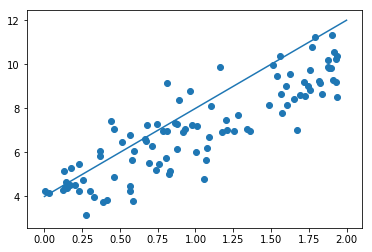

In [4]:
from myutils.draw.math import plt_2d_functions

# plot the line
w_0, w_1 = theta_best[0][0], theta_best[1][0]
plt_2d_functions([lambda x: w_0 + w_0*x], np.arange(0, 3))
plt.scatter(X, y)

Now justs generalize to three dimensions. This time using sklearns `learn_model`.

In [5]:
# random x and y axis
x = 2 * np.random.rand(100, 1)
y = 2 * np.random.rand(100, 1)

# z = 4 + 3x + guassian noise + 4 + 3y + guassian noise
z = 4 + 3 * x + np.random.randn(100, 1) + 4 + 3 * y + np.random.randn(100, 1)

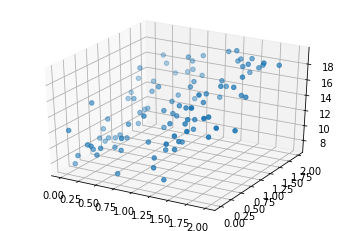

In [6]:
from myutils.draw.scatter import matlib_3d


matlib_3d(x, y, z)
plt.show()

In [7]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()
X, y = np.c_[x, y], z
reg.fit(X, y)

w_0, w_1, w_2 = reg.intercept_[0], reg.coef_[0][0], reg.coef_[0][1]

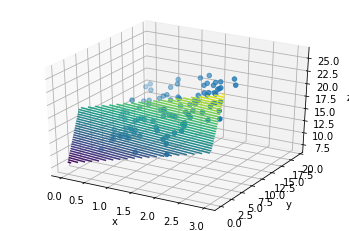

In [9]:
matlib_3d(x, y, z, lambda x_1, x_2: w_0 + w_1*x_1 + w_2*x_2, 
          np.arange(0, 4), np.arange(0, 4))
plt.show()

[TODO]
https://docs.scipy.org/doc/numpy-1.14.0/reference/generated/numpy.linalg.svd.html


### The Math

There is more than one way to compute the least squares solution. `LinearRegression` computes the solution using singular value decomposition of X. Then complexity of this algorithm is $O(np^2)$ given matrix `X.shape=(n, p)`.
